<a href="https://colab.research.google.com/github/Cartsms/Actividad-Ciencia-de-Datos/blob/main/Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Mostrar las primeras filas y verificar tipos de datos.**

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Cargar dataset desde Google Drive
url = "https://drive.google.com/file/d/12a3i4cTrVkVrs1u_bKLB6nwn4HHoNEPU/view?usp=sharing"
file_id = url.split("/")[-2]
df = pd.read_csv(f"https://drive.google.com/uc?id={file_id}&export=download")

# Mostrar las primeras filas y tipos de datos
print("Primeras filas del dataset:")
display(df.head())

print("\nTipos de datos:")
print(df.dtypes)

Primeras filas del dataset:


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000



Tipos de datos:
Position    object
Level        int64
Salary       int64
dtype: object



# **2) Ajustar un modelo de regresión lineal simple (Salary ~ Level) con LinearRegression.**



Coeficiente (pendiente): 80878.7879
Intercepto: -195333.3333
Predicción para Level = 4: $128181.82

Métricas del modelo lineal:
R²: 0.6690
MSE: 26695878787.8788
MAE: 128454.5455


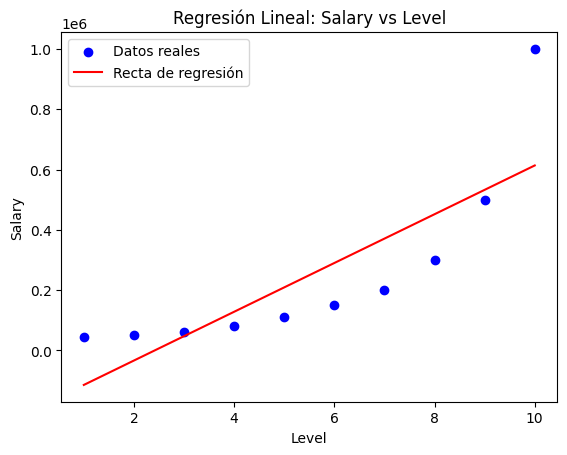

In [2]:
# Variables
X = df[['Level']].values
y = df['Salary'].values

# Modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Coeficiente e intercepto
print(f"Coeficiente (pendiente): {lin_reg.coef_[0]:.4f}")
print(f"Intercepto: {lin_reg.intercept_:.4f}")

# Predicción puntual
level_test = 4
prediccion = lin_reg.predict([[level_test]])[0]
print(f"Predicción para Level = 4: ${prediccion:.2f}")

# Métricas
y_pred_lin = lin_reg.predict(X)
r2_lin = r2_score(y, y_pred_lin)
mse_lin = mean_squared_error(y, y_pred_lin)
mae_lin = mean_absolute_error(y, y_pred_lin)

print(f"\nMétricas del modelo lineal:")
print(f"R²: {r2_lin:.4f}")
print(f"MSE: {mse_lin:.4f}")
print(f"MAE: {mae_lin:.4f}")

# Gráfico
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred_lin, color='red', label='Recta de regresión')
plt.title('Regresión Lineal: Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

# **3) Ajustar un modelo de regresión polinómica de grado 2.**


Métricas del modelo polinómico (grado 2):
R²: 0.9162
MSE: 6758833333.3333
MAE: 70218.1818


/tmp/ipython-input-1860916001.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)


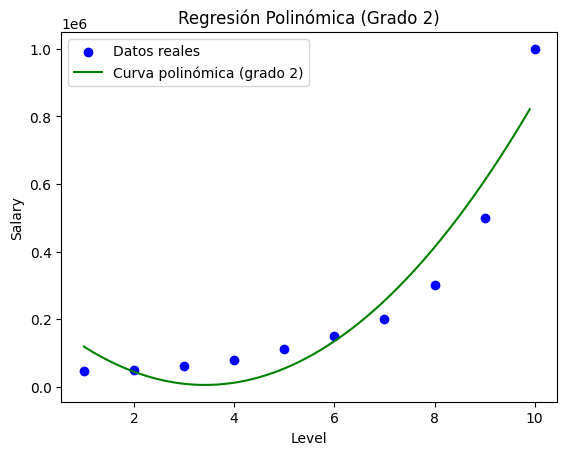

In [3]:
# Generar variables polinómicas
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Modelo polinómico
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predicciones
y_pred_poly = poly_reg.predict(X_poly)

# Métricas
r2_poly = r2_score(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
mae_poly = mean_absolute_error(y, y_pred_poly)

print(f"\nMétricas del modelo polinómico (grado 2):")
print(f"R²: {r2_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"MAE: {mae_poly:.4f}")

# Gráfico
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X_grid, poly_reg.predict(poly.transform(X_grid)), color='green', label='Curva polinómica (grado 2)')
plt.title('Regresión Polinómica (Grado 2)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()


# **4) Aplicar regularización Lasso (con alpha=0.1) sobre el modelo polinómico.**


Métricas del modelo Lasso (α=0.1):
R²: 0.9162
MSE: 6758833333.3645


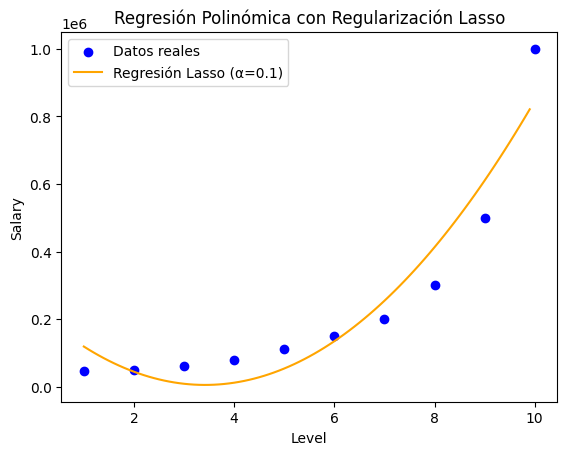

In [4]:
# Modelo Lasso sobre variables polinómicas
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, y)
y_pred_lasso = lasso_reg.predict(X_poly)

# Métricas
r2_lasso = r2_score(y, y_pred_lasso)
mse_lasso = mean_squared_error(y, y_pred_lasso)

print(f"\nMétricas del modelo Lasso (α=0.1):")
print(f"R²: {r2_lasso:.4f}")
print(f"MSE: {mse_lasso:.4f}")

# Gráfico
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X_grid, lasso_reg.predict(poly.transform(X_grid)), color='orange', label='Regresión Lasso (α=0.1)')
plt.title('Regresión Polinómica con Regularización Lasso')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

# **5) Analizar los resultados:**


a) **¿Cuál modelo se ajusta mejor a los datos?**\
El modelo polinómico de grado 2 suele ajustarse mejor, porque captura la curvatura de la relación entre Level y Salary, mientras que el modelo lineal solo representa una recta (subajuste).
Esto se refleja en un R² más alto y MSE más bajo.

b) **¿Qué efecto produce la regularización Lasso?**\
La regularización Lasso agrega una penalización a los coeficientes grandes, reduciendo la complejidad del modelo.
En este caso, suaviza la curva polinómica y puede hacer que algunos coeficientes sean exactamente cero (simplificando el modelo).
El ajuste visual puede ser un poco peor, pero el modelo se vuelve más generalizable y menos propenso al sobreajuste.

c) **¿Qué limitación tiene evaluar el modelo con los mismos datos de entrenamiento?**\
Si se evalúa sobre los mismos datos usados para entrenar, las métricas pueden ser optimistas: el modelo puede memorizar los patrones sin generalizar.
Por eso, en un análisis más riguroso, se debería dividir el dataset en train/test o usar validación cruzada.
